# Task1
Load in the dataset with the yearly number of deaths.



In [2]:
import pandas as pd
yearly=pd.read_csv("yearly_deaths_by_clinic.csv")
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Task2
Calculate the yearly proportion of deaths.

In [3]:
yearly["proportion_deaths"]=yearly['deaths']/yearly['births']
#Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2
yearly1=yearly[yearly["clinic"]=='clinic 1']
yearly2=yearly[yearly["clinic"]=='clinic 2']
#Printing yearly1
yearly1 

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task3
Plot the yearly proportion of deaths for both clinics.

Text(0, 0.5, 'Proportion deaths')

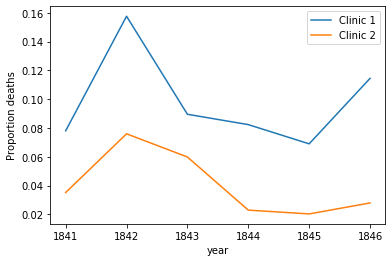

In [4]:
import matplotlib.pyplot as plt
ax = yearly1.plot(x='year',y='proportion_deaths',label='Clinic 1')
yearly2.plot(x='year',y='proportion_deaths',label='Clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

# Task4
Load in the dataset with the monthly number of deaths for Clinic 1.

In [5]:
#Load the dataset and assign to variable monthly
monthly=pd.read_csv("monthly_deaths.csv",parse_dates=['date'])

#Calculate the proportion of deaths
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

#Print out the first rows
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task5
Plot the monthly proportion of deaths for Clinic 1.

Text(0, 0.5, 'Proportion deaths')

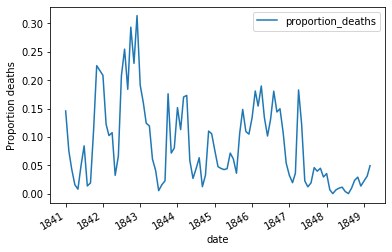

In [8]:
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

# Task6
Make a plot that highlights the effect of handwashing.

Text(0, 0.5, 'Proportion deaths')

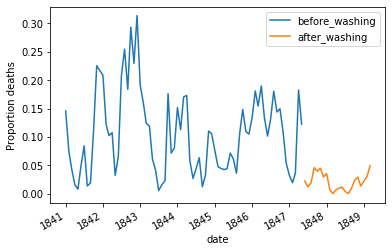

In [17]:
handwashing_start = pd.to_datetime('1847-06-01')
# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date']< handwashing_start]
after_washing = monthly[monthly['date']>= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
# ... YOUR CODE FOR TASK 6 ...
%matplotlib inline
ax=before_washing.plot(x='date',y='proportion_deaths',label='before_washing')
after_washing.plot(x='date',y='proportion_deaths',label='after_washing', ax=ax)
ax.set_ylabel('Proportion deaths')

# Task7

In [15]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff

-0.0839566075118334

# task8
Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

In [18]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()- boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.101029
0.975   -0.067950
dtype: float64

# task9


In [20]:
result = True